# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
#print('The state for the second agent looks like:', states[1])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.08149999817833305


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [6]:
import torch
import torch.nn.functional as F
import torch.nn as nn

from collections import deque
import random
import torch.optim as optim
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
#action_space: sin(theta),cos(theta) of both joints. Hence, size=4
BUFFER_SIZE=100000
BATCH_SIZE=128
GAMMA=0.99
TAU=0.001

LRactor=5e-4
LRcritic=5e-4
UPDATE_EVERY=1

#add seed to classes

cpu


In [7]:
import torch.nn
class Actor(nn.Module):
    def __init__(self,state_size=33, action_size=4,seed=0):
        super(Actor, self).__init__()
        self.state_size=state_size
        self.action_size=action_size
        self.fc1=nn.Linear(self.state_size,128)
        self.bn1 = nn.BatchNorm1d(128)

        self.fc2=nn.Linear(128,128)
        self.fc3=nn.Linear(128,self.action_size)
        self.seed=torch.manual_seed(seed)
    def forward(self, x):
        #return F.tanh(self.fc3(F.relu(self.fc2(self.bn1(F.relu(self.fc1(x)))))))
        x=F.relu(self.fc1(x))
        #x=self.bn1(x)
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return F.tanh(x)

state=np.array([  0.00000000e+00,-4.00000000e+00 ,  0.00000000e+00  , 1.00000000e+00,
  -0.00000000e+00 , -0.00000000e+00 , -4.37113883e-08 ,  0.00000000e+00,
   0.00000000e+00 ,  0.00000000e+00  , 0.00000000e+00  , 0.00000000e+00,
   0.00000000e+00 ,  0.00000000e+00 , -1.00000000e+01 ,  0.00000000e+00,
   1.00000000e+00 , -0.00000000e+00 , -0.00000000e+00 , -4.37113883e-08,
   0.00000000e+00 ,  0.00000000e+00  , 0.00000000e+00 ,  0.00000000e+00,
   0.00000000e+00 ,  0.00000000e+00  , 7.90150833e+00 , -1.00000000e+00,
   1.25147629e+00 ,  0.00000000e+00  , 1.00000000e+00 ,  0.00000000e+00,
  -5.22214413e-01])           

In [8]:
class Critic(nn.Module):
    def __init__(self, state_size=33,action_size=4,seed=0):
        super(Critic, self).__init__()
        self.state_size=state_size
        self.action_size=action_size
        self.fc1=nn.Linear(self.state_size,128)
        self.bn1 = nn.BatchNorm1d(128)

        self.fc2=nn.Linear(128+self.action_size,128)
        self.fc3=nn.Linear(128,1)
        self.seed=torch.manual_seed(seed)
    def forward(self,state,action):
        x=F.relu(self.fc1(state))
        #x=self.bn1(x)
        #print(x.shape)
        action=action.view(BATCH_SIZE,-1)
        #print(action.shape)
        x=torch.cat([x,action],1)
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x




In [9]:
class Memory:
    def __init__(self,seed=0):
        self.memory=deque(maxlen=BUFFER_SIZE)
        self.seed=torch.manual_seed(seed)
    def add(self,state, action, reward,next_state,done):
        self.memory.append([state,action,reward,next_state,done])
    def sample(self,batch_size=BATCH_SIZE):
        experiences=random.sample(self.memory, k=batch_size)
        states=[]
        actions=[]
        rewards=[]
        next_states=[]
        dones=[]
        for i in experiences:
            states.append(i[0])
            actions.append(i[1])
            rewards.append(i[2])
            next_states.append(i[3])
            dones.append(i[4])
        return states, actions,rewards,next_states, dones
    def __len__(self):
        return len(self.memory)

In [10]:
import copy
class OUNoise(object):
    def __init__(self, action_space=4, mu=0.0, theta=0.15, max_sigma=0.3, min_sigma=0.3, decay_period=100000,seed=0):
        self.mu           = mu
        self.theta        = theta
        self.sigma        = max_sigma
        self.max_sigma    = max_sigma
        self.min_sigma    = min_sigma
        self.decay_period = decay_period
        self.action_dim   = 4
        self.low          = -1
        self.high         = 1
        self.seed=torch.manual_seed(seed)
        self.reset()
        
    def reset(self):
        self.state = np.ones(self.action_dim) * self.mu
        
    def evolve_state(self):
        x  = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.randn(self.action_dim)
        self.state = x + dx
        return self.state
    
    def get_action(self, action, t=0):
        ou_state = self.evolve_state()
        self.sigma = self.max_sigma - (self.max_sigma - self.min_sigma) * min(1.0, t / self.decay_period)
        return np.clip(action + ou_state, self.low, self.high)

In [11]:
class DDPG:
    def __init__(self,state_size=33,action_size=4,seed=0):
        self.state_size=state_size
        self.action_size=action_size
        
        self.actorlocal=Actor(state_size,action_size).to(device)
        self.actortarget=Actor(state_size,action_size).to(device)
        
        self.criticlocal=Critic(state_size,action_size).to(device)
        self.critictarget=Critic(state_size,action_size).to(device)
        
        self.memory=Memory()
        
        self.noise=OUNoise(action_space=action_size)
        
        self.t_step=0
        self.optimizeractor=optim.Adam(self.actorlocal.parameters(),lr=LRactor)
        self.optimizercritic=optim.Adam(self.criticlocal.parameters(),lr=LRcritic)
        self.critic_criterion  = nn.MSELoss()
        self.seed=torch.manual_seed(seed)
        self.hard_copy_weights(self.actortarget, self.actorlocal)
        self.hard_copy_weights(self.critictarget, self.criticlocal)


    
    def hard_copy_weights(self, target, source):
        """ copy weights from source to target network (part of initialization)"""
        for target_param, param in zip(target.parameters(), source.parameters()):
            target_param.data.copy_(param.data)
    
    def step(self,state, action,reward,next_state, done):
        self.memory.add(state, action,reward,next_state,done)
        self.t_step=(self.t_step+1)%UPDATE_EVERY
        if(self.t_step==0):
            if(len(self.memory)>=BATCH_SIZE):
                experiences=self.memory.sample()
                self.learn(experiences)
    
    def act(self,state):
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        action = self.actorlocal(state)
        action = action.cpu().detach().numpy()
        """if True:
            action += self.noise.sample()"""
        #return np.clip(action, -1, 1)
        return action
        
        
    
    def learn(self,experiences):
        states, actions, rewards, next_states, dones = experiences
        states = torch.FloatTensor(states).to(device)
        actions = torch.FloatTensor(actions).to(device)
        rewards = torch.FloatTensor(rewards).to(device)
        next_states = torch.FloatTensor(next_states).to(device)
        dones=torch.FloatTensor(dones).to(device)
    
        # Critic loss        
        Qvals = self.criticlocal(states, actions)
        next_actions = self.actortarget(next_states)
        next_Q = self.critictarget(next_states, next_actions.detach())
        rewards=rewards.view(BATCH_SIZE,1)
        dones=dones.view(BATCH_SIZE,1)
        Qprime = rewards + (GAMMA * next_Q *(1-dones))
        #print(Qprime)
        #print(Qvals)
        critic_loss = self.critic_criterion(Qvals, Qprime.detach())

        # Actor loss
        policy_loss = -self.critictarget(states, self.actorlocal(states)).mean()
        
        # update networks
        self.optimizeractor.zero_grad()
        policy_loss.backward()
        self.optimizeractor.step()

        self.optimizercritic.zero_grad()
        critic_loss.backward() 
        self.optimizercritic.step()

        # update target networks 
        for target_param, param in zip(self.actortarget.parameters(), self.actorlocal.parameters()):
            target_param.data.copy_(param.data * TAU + target_param.data * (1.0 - TAU))
       
        for target_param, param in zip(self.critictarget.parameters(), self.criticlocal.parameters()):
            target_param.data.copy_(param.data * TAU + target_param.data * (1.0 - TAU))       

In [12]:
num_episodes=1000
#eps=1
#eps_decay=0.995
#eps_final=0.01
agent=DDPG()
noise=OUNoise()
scores_lst=[]
scores_window=deque(maxlen=100)
for i in range(num_episodes+1):    
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)
    
    t_step=0
    agt_ctr=-1
    while True:
        #actions=[]
    
        """for j in range(20):
            action=agent.act(states[j])
            action=noise.get_action(action,t_step)
            actions.append(action)"""
        actions=[noise.get_action(agent.act(states[j]),t_step) for j in range(20)]
        env_info = env.step(actions)[brain_name]           
        next_states = env_info.vector_observations         
        rewards = env_info.rewards                         
        dones = env_info.local_done
        if(t_step%2==0):
            agt_ctr=(agt_ctr+1)%20
            agent.step(states[agt_ctr],actions[agt_ctr],rewards[agt_ctr],next_states[agt_ctr],dones[agt_ctr])
        for j in range(20):
            if(j!=agt_ctr):
                agent.memory.add(states[j],actions[j], rewards[j],next_states[j],dones[j])        
        scores += env_info.rewards
        states = next_states                               
        t_step+=1
        if np.any(dones):                                  
            break
    scores_lst.append(scores)
    scores_window.append(scores)
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i, np.mean(scores_window)), end="")
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i, np.mean(scores_window)))
    if np.mean(scores_window)>30.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i, np.mean(scores_window)))
        torch.save(agent.actorlocal.state_dict(), 'checkpointactor.pth')
        torch.save(agent.criticlocal.state_dict(),'checkpointcritic.pth')
        break

Episode 0	Average Score: 0.86
Episode 1	Average Score: 1.02
Episode 2	Average Score: 0.99
Episode 3	Average Score: 0.98
Episode 4	Average Score: 1.00
Episode 5	Average Score: 0.97
Episode 6	Average Score: 0.93
Episode 7	Average Score: 0.86
Episode 8	Average Score: 0.84
Episode 9	Average Score: 0.83
Episode 10	Average Score: 0.82
Episode 11	Average Score: 0.80
Episode 12	Average Score: 0.80
Episode 13	Average Score: 0.82
Episode 14	Average Score: 0.85
Episode 15	Average Score: 0.88
Episode 16	Average Score: 0.90
Episode 17	Average Score: 0.93
Episode 18	Average Score: 0.97
Episode 19	Average Score: 1.01
Episode 20	Average Score: 1.03
Episode 21	Average Score: 1.07
Episode 22	Average Score: 1.10
Episode 23	Average Score: 1.13
Episode 24	Average Score: 1.15
Episode 25	Average Score: 1.20
Episode 26	Average Score: 1.22
Episode 27	Average Score: 1.25
Episode 28	Average Score: 1.28
Episode 29	Average Score: 1.33
Episode 30	Average Score: 1.39
Episode 31	Average Score: 1.42
Episode 32	Average

Text(0.5,0,'Episode #')

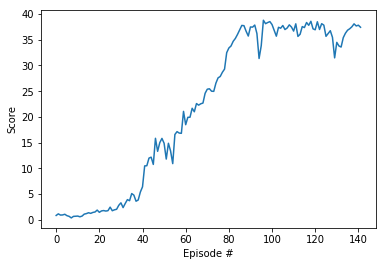

In [14]:
#plot the figure
from matplotlib import pyplot as plt
scores_avg_lst=[np.mean(i) for i in scores_lst]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_avg_lst)), scores_avg_lst)
plt.ylabel('Score')
plt.xlabel('Episode #')

In [ ]:
######################################################################################################################

In [ ]:
#One agent implementation below (ignore)

In [12]:
"""#for one agent
def reset(env):
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    return env_info.vector_observations[0]

def step(env,action):
    env_info = env.step(action)[brain_name]       
    next_state = env_info.vector_observations[0]  
    reward = env_info.rewards[0]                  
    done = env_info.local_done[0]                 
    return next_state,reward,done


num_episodes=2000
#eps=1
#eps_decay=0.995
#eps_final=0.01
agent=DDPG()
noise=OUNoise()
scores=[]
scores_window=deque(maxlen=100)
for i in range(num_episodes+1):
    state=reset(env)
    noise.reset()
    score=0
    j=0
    agt_ctr=0
    t_step=0
    while(True):
        action=agent.act(state)
        action=noise.get_action(action,t_step)
        next_state,reward,done=step(env,action)
        agent.step(state,action,reward,next_state,done)
        state=next_state
        score+=reward
        t_step+=1
        if done:
                #eps=max(eps*eps_decay,eps_final)
                break
    scores_window.append(score) 
    scores.append(score)
    #print(score)
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i, np.mean(scores_window)), end="")
    #if i % 100 == 0:
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i, np.mean(scores_window)))
    if np.mean(scores_window)>30.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i-100, np.mean(scores_window)))
        #torch.save(agent.qlocal.state_dict(), 'checkpoint.pth')
        break"""

Episode 0	Average Score: 0.35
Episode 1	Average Score: 0.30
Episode 2	Average Score: 0.38
Episode 3	Average Score: 0.57
Episode 4	Average Score: 0.73
Episode 5	Average Score: 0.86
Episode 6	Average Score: 0.87
Episode 7	Average Score: 0.80
Episode 8	Average Score: 0.84
Episode 9	Average Score: 0.93
Episode 10	Average Score: 0.89
Episode 11	Average Score: 0.87
Episode 12	Average Score: 0.84
Episode 13	Average Score: 0.81
Episode 14	Average Score: 0.95
Episode 15	Average Score: 0.91
Episode 16	Average Score: 0.87
Episode 17	Average Score: 0.88
Episode 18	Average Score: 0.94
Episode 19	Average Score: 0.94
Episode 20	Average Score: 0.94
Episode 21	Average Score: 0.97
Episode 22	Average Score: 0.99
Episode 23	Average Score: 0.97
Episode 24	Average Score: 0.95
Episode 25	Average Score: 0.98
Episode 26	Average Score: 0.98
Episode 27	Average Score: 1.00
Episode 28	Average Score: 0.97
Episode 29	Average Score: 0.99
Episode 30	Average Score: 0.99
Episode 31	Average Score: 1.02
Episode 32	Average

KeyboardInterrupt: 

Text(0.5,0,'Episode #')

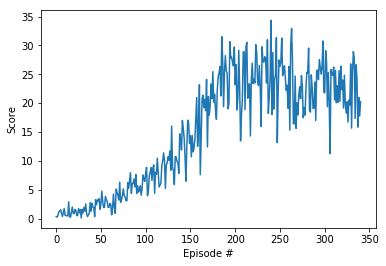

In [14]:
"""from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')"""

369